## 회귀분석
- 회귀 분석은 실젯값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능평가지표가 발전
- 실젯값과 예측값의 차이를 구해서 이것들을 단순히 합하게 되면 +와 -가 섞여 오류를 상쇄할 수 있다.  

### MAE (Mean Absolute Error)
- 실젯값과 예측값의 차이를 절댓값으로 변환해 평균한 것
- 에러의 크기가 그대로 반영
- 이상치에 영향을 받는다.

### MSE (Mean Squared Eroor)
- 실젯값과 예측값의 차이를 제곱해 평균한 것
- 실젯값과 예측값 차이의 면적 합을 의미
- 특이값이 존재하면 수치가 증가

### RMSE (Root Mean Squared Error)
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 루트를 씌운것
- 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커짖 않도록 상쇄하기 위해 사용

### MSLE (Mean Squared Log Error)
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류평균보다 값이 더 커지지 않도록 상쇄하기 위하여 사용

### MAPE (Mean Absolute Percentage Error)
- MAE를 퍼센터로 변환한 것 
- 오차가 예측값에서 차지하는 정도를 나타냄

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

In [2]:
boston_load = load_boston()
boston = pd.DataFrame(boston_load.data, columns=boston_load.feature_names)
boston['Price'] = boston_load.target

c:\Users\moons\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [ ]:
boston.to_csv("boston.csv",index=False, encoding='utf-8')

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
## 데이터 확인
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
## 결측치 확인
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

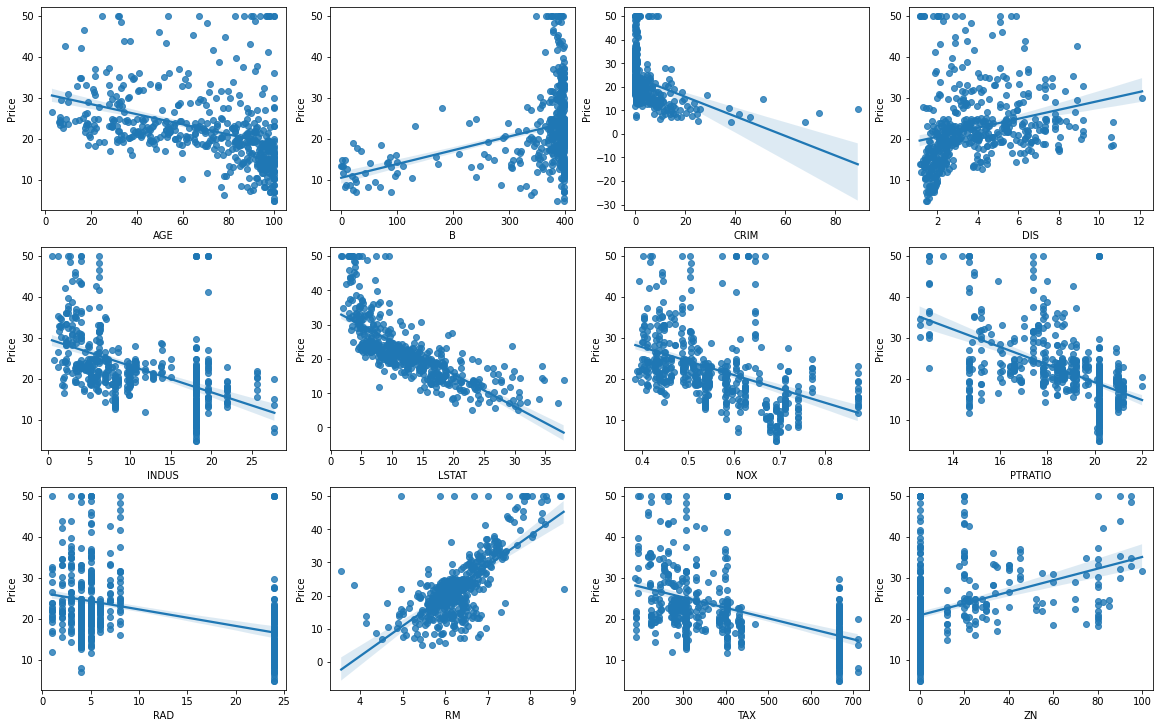

In [10]:
## 산점도와 선형 회귀직선 시각화

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 10), ncols = 4, nrows = 3, constrained_layout = True)
features = boston.columns.difference(['Price', 'CHAS'])

for i, feature in zip(range(12), features):
    row  = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = boston['Price'], data=boston, ax=axs[row][col])

In [12]:
## 데이터 분할
from sklearn.model_selection import train_test_split

x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = boston['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [13]:
print("학습데이터세트 price 평균 :", y_train.mean())
print("평가데이터세트 price 평균 :", y_test.mean())

학습데이터세트 price 평균 : 22.796534653465343
평가데이터세트 price 평균 : 21.488235294117644


In [15]:
## 데이터 전처리 
## 비율, 농도, 개수 등 서로 다른 단위를 가진 연속형 자료
## Min-Max 방법으로 정규화 과정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)

In [16]:
## 모델 학습
## linearRegression(선형 회귀) 알고리즘
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train_sc, y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

## predict()로 학습데이터를 예측한 값을 저장
pred_train = linear.predict(x_train_sc)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
## 결정계수 출력
r2 = r2_score(y_train, pred_train)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

## 모델의 설명력은 74.5%로 양호하게 출력됨
## MAE를 통하여 pred_train, y_train은 평균 3.32 정도 차이를 보인다.

MAE:  3.32616
MSE:  22.11246
RMSE:  4.70239
R2:  0.74546


In [19]:
## 성능평가 및 예측값 저장
## x_test를 scaler.transform()에 입력하여 x_train과 같은 방식으로 Min-Max 정규화를 수행
## x_test_sc를 훈련된 모델에 입력해 예측값을 pred에 저장

x_test_sc = scaler.transform(x_test)
pred = linear.predict(x_test_sc) 

In [20]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

## pred와 y_test를 비교하여 선형 회귀 모델의 예측성능을 평가
## 모델의 설명력은 66.4%
## MAE를 통하여 pred와 y_test는 평균 3.23 정도의 차이를 보인다.

MAE:  3.23724
MSE:  24.63539
RMSE:  4.96341
R2:  0.66406


In [22]:
pred_df = pd.DataFrame(pred, columns=['pred Price'])
pred_df.head()

,pred Price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927


In [23]:
actual = pd.DataFrame(y_test, columns=['actual Price'])
actual.head()

,actual Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [24]:
## 2개의 데이터프레임을 결합 후 csv로 저장
reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.to_csv('reg_result.csv', index=False, encoding='utf-8-sig')
reg_result.head()

,actual Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927
